In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("train.csv")

### 1. How big is the data?

In [3]:
df.shape

(891, 12)

### 2. How does the data look like?

In [5]:
#here you can use head function but sometimes if there is biased data at the start then it would create a wrong impression about the data
# so try to use sample method which will randomly select the rows present in the dataset
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
253,254,0,3,"Lobb, Mr. William Arthur",male,30.0,1,0,A/5. 3336,16.1000,NaN,S
686,687,0,3,"Panula, Mr. Jaako Arnold",male,14.0,4,1,3101295,39.6875,NaN,S
272,273,1,2,"Mellinger, Mrs. (Elizabeth Anne Maidment)",female,41.0,0,1,250644,19.5000,NaN,S
773,774,0,3,"Elias, Mr. Dibo",male,NaN,0,0,2674,7.2250,NaN,C
864,865,0,2,"Gill, Mr. John William",male,24.0,0,0,233866,13.0000,NaN,S


### 3. What is the data type of cols?

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 4. Are there any missing values?

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 5. How does the data look mathematically? (applicable for numeric cols only)

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 6. Are there any duplicate values?

In [9]:
df.duplicated().sum() #there are no duplicate rows

0

In [11]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Let's plot some graphs

In [14]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

Text(0.5, 1.0, 'Count of Male/Female which survived or not')

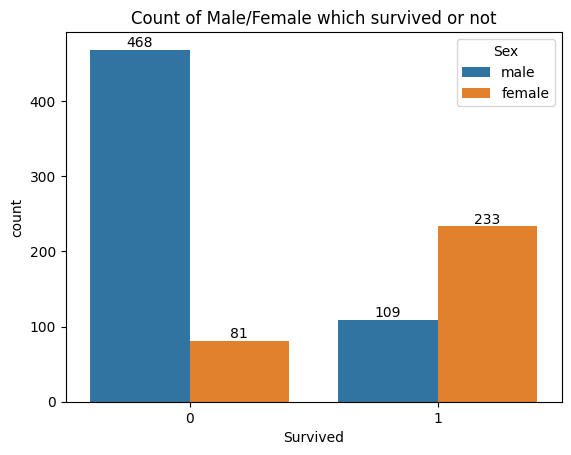

In [16]:
ax = sns.countplot(x='Survived',data=df,hue='Sex')
ax.bar_label(ax.containers[0], label_type='edge')
ax.bar_label(ax.containers[1], label_type='edge')
plt.title("Count of Male/Female which survived or not")

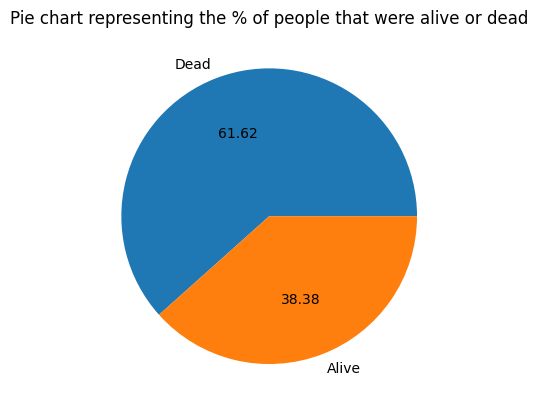

In [17]:
count = [df['Survived'].value_counts()[0],df['Survived'].value_counts()[1]]
label = ['Dead','Alive']
plt.pie(x=count,labels=label,autopct='%.2f')
plt.title("Pie chart representing the % of people that were alive or dead")
plt.show()

Text(0.5, 1.0, 'Count of passengers either survived or dead based on Passenger class')

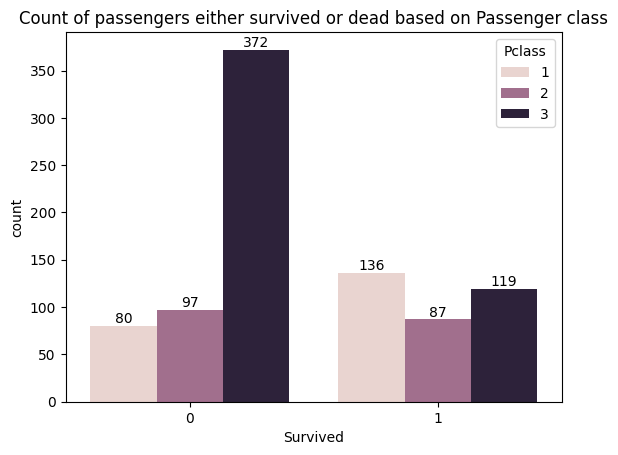

In [19]:
ax = sns.countplot(x='Survived',data=df,hue='Pclass')
ax.bar_label(ax.containers[0], label_type='edge')
ax.bar_label(ax.containers[1], label_type='edge')
ax.bar_label(ax.containers[2], label_type='edge')
plt.title("Count of passengers either survived or dead based on Passenger class")

In [20]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

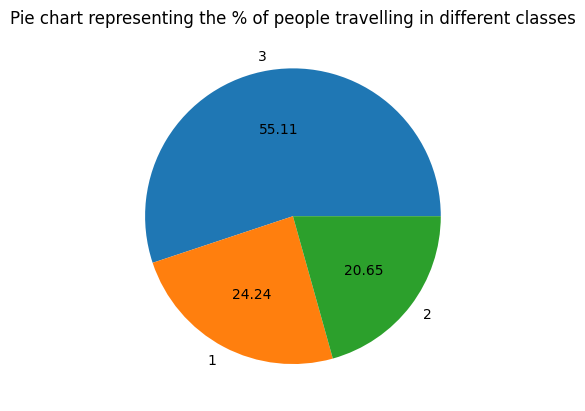

In [21]:
count = df['Pclass'].value_counts()
label = ['3','1','2']
plt.pie(x=count,labels=label,autopct='%.2f')
plt.title("Pie chart representing the % of people travelling in different classes")
plt.show()

Text(0.5, 1.0, 'Count of Male/Female travelling across different passenger classes')

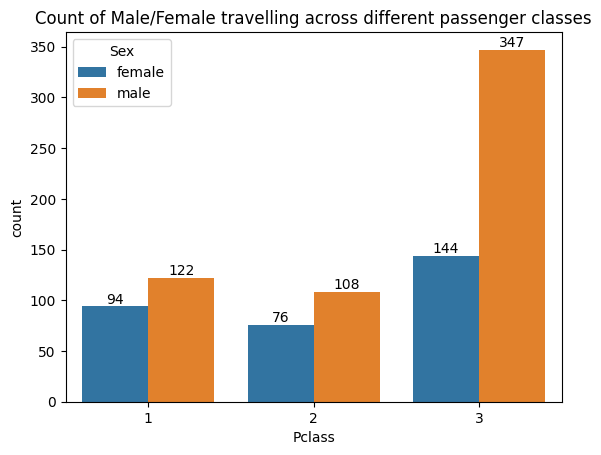

In [22]:
ax = sns.countplot(x='Pclass',data=df,hue='Sex')
ax.bar_label(ax.containers[0], label_type='edge')
ax.bar_label(ax.containers[1], label_type='edge')
plt.title("Count of Male/Female travelling across different passenger classes")

Text(0.5, 1.0, 'Distribution of Age group')

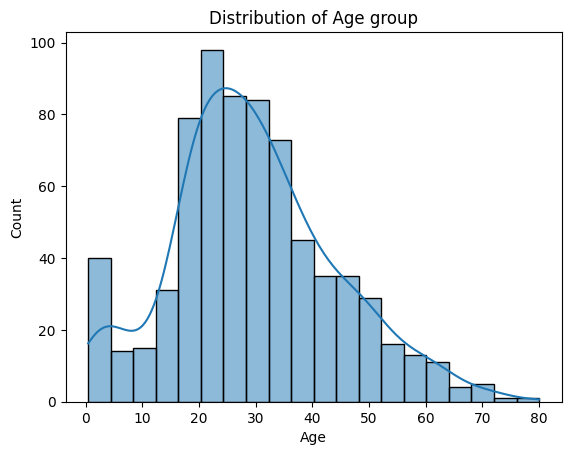

In [23]:
sns.histplot(x='Age',data=df,kde=True)
plt.title("Distribution of Age group")

In [24]:
df['Age'].value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

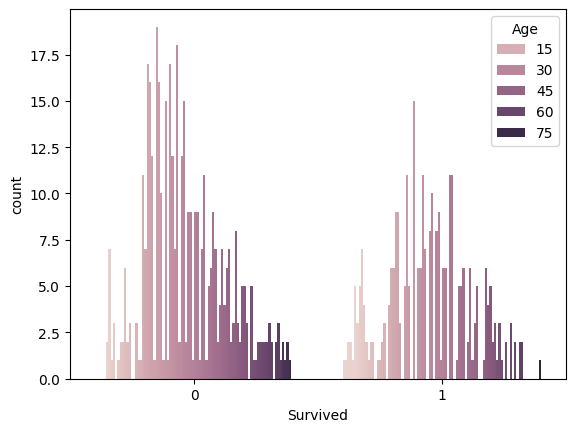

In [29]:
sns.countplot(x='Survived',data=df,hue='Age')

Text(0.5, 1.0, 'Distribution of survival based on sex')

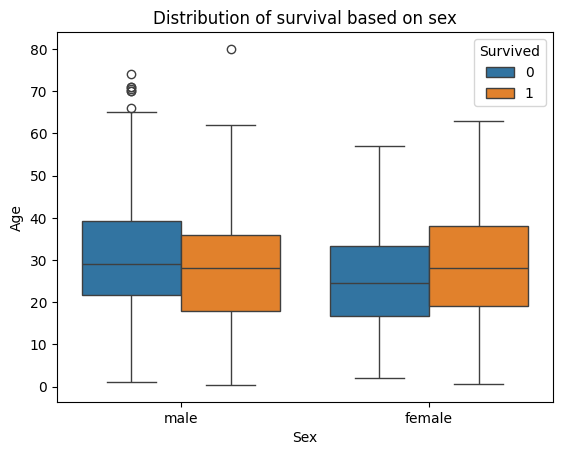

In [31]:
sns.boxplot(x='Sex',y='Age',data=df,hue='Survived')
plt.title("Distribution of survival based on sex")

Text(0.5, 1.0, 'Age Distribution')

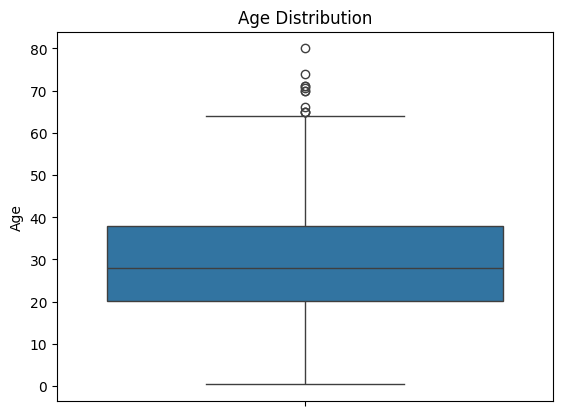

In [34]:
sns.boxplot(df['Age'])
plt.title("Age Distribution")

Text(0.5, 1.0, 'Fare Distribution')

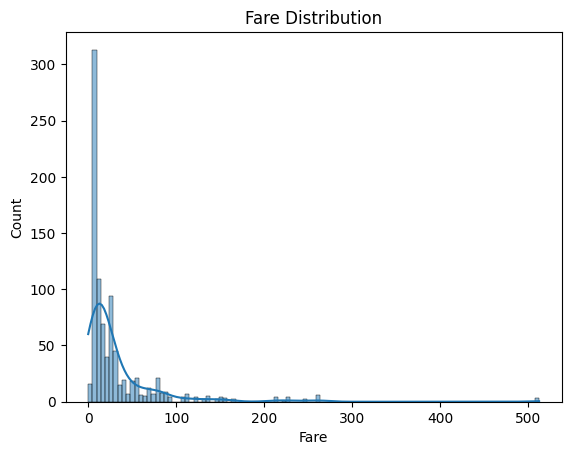

In [35]:
sns.histplot(x='Fare',data=df,kde=True)
plt.title("Fare Distribution")

<Axes: xlabel='Pclass', ylabel='Fare'>

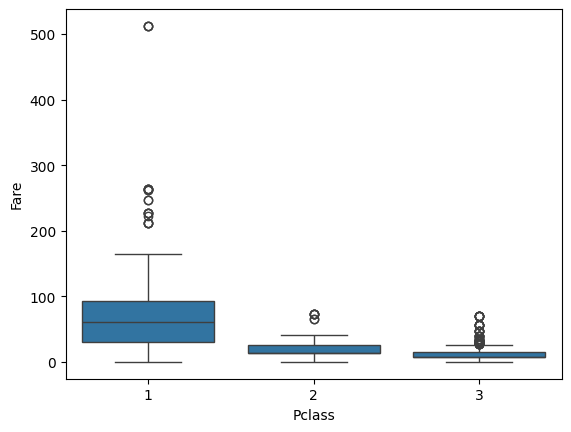

In [36]:
sns.boxplot(y=df['Fare'],x='Pclass',data=df)

In [39]:
x = df.groupby("Pclass")['Fare'].mean().index
y = df.groupby("Pclass")['Fare'].mean().tolist()

<ipython-input-40-23f4b33093a4>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x,y=y,palette='mako')


Text(0.5, 1.0, 'Mean fare across passenger classes')

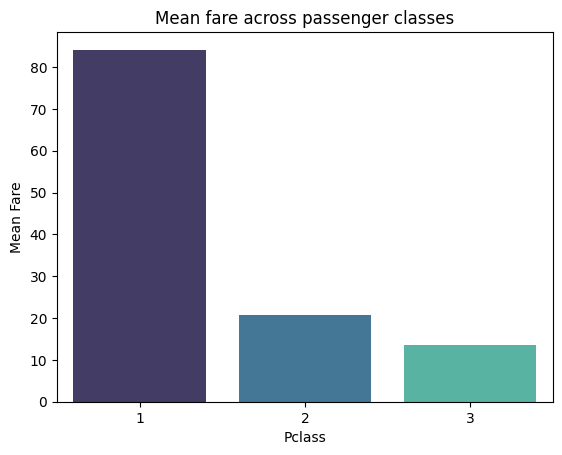

In [40]:
sns.barplot(x=x,y=y,palette='mako')
plt.xlabel('Pclass')
plt.ylabel('Mean Fare')
plt.title('Mean fare across passenger classes')

In [41]:
hm = pd.pivot_table(index='Pclass',columns='Sex',data=df,aggfunc='mean',values='Fare')

In [42]:
hm

Sex,female,male
Pclass,,
1,106.125798,67.226127
2,21.970121,19.741782
3,16.118810,12.661633


<Axes: xlabel='Sex', ylabel='Pclass'>

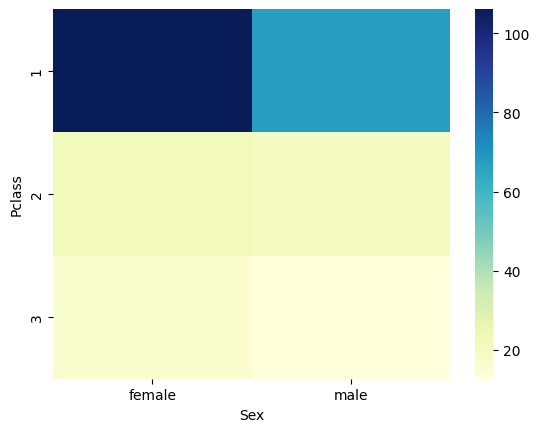

In [43]:
sns.heatmap(hm,cmap="YlGnBu")

Text(0.5, 1.0, 'Age distribution - Dead')

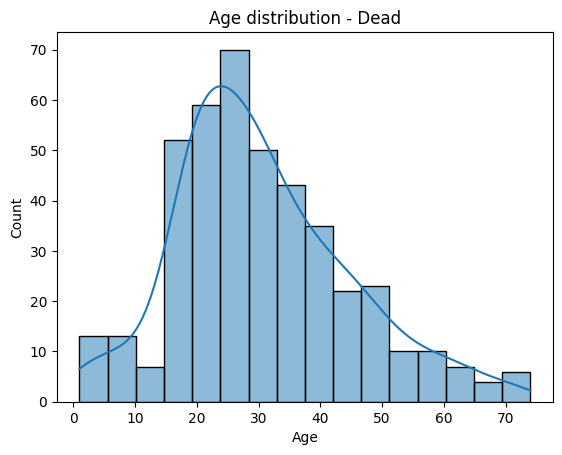

In [45]:
sns.histplot(x='Age',data=df[df['Survived'] == 0],kde=True)
plt.title("Age distribution - Dead")

Text(0.5, 1.0, 'Age distribution - Survived')

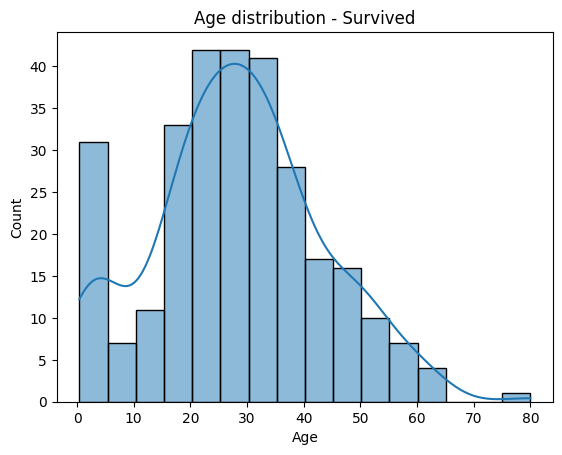

In [46]:
sns.histplot(x='Age',data=df[df['Survived'] == 1],kde=True)
plt.title("Age distribution - Survived")

In [ ]:
df.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

<Axes: xlabel='Embarked'>

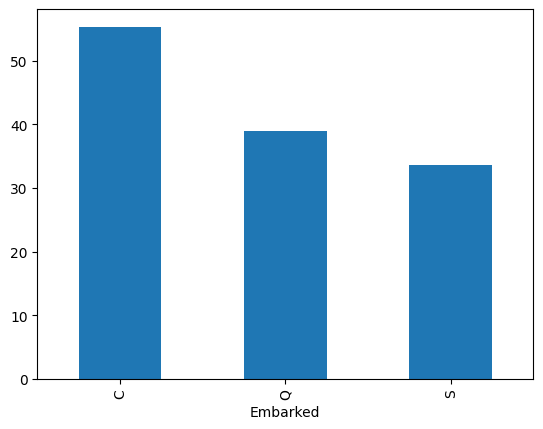

In [49]:
(df.groupby('Embarked')['Survived'].mean()*100).plot(kind='bar')

Text(0.5, 1.0, 'Count of passengers onboarded from different ports across various passenger class')

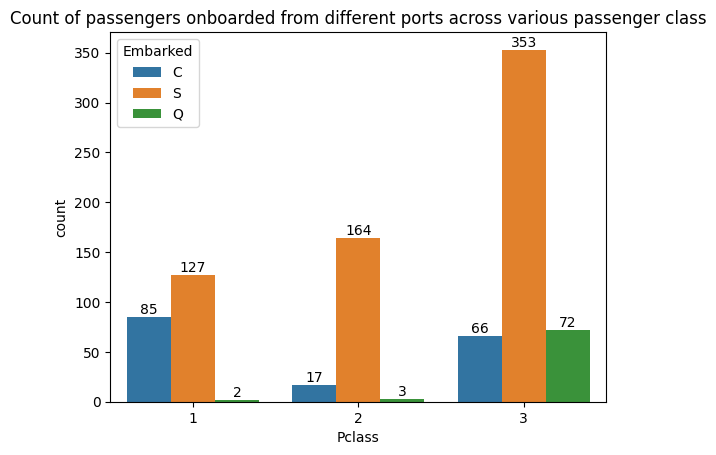

In [50]:
ax = sns.countplot(x='Pclass',hue='Embarked',data=df)
ax.bar_label(ax.containers[0], label_type='edge')
ax.bar_label(ax.containers[1], label_type='edge')
ax.bar_label(ax.containers[2], label_type='edge')
plt.title("Count of passengers onboarded from different ports across various passenger class")

Text(0.5, 1.0, 'Count of passengers onboarded from various ports based on sex')

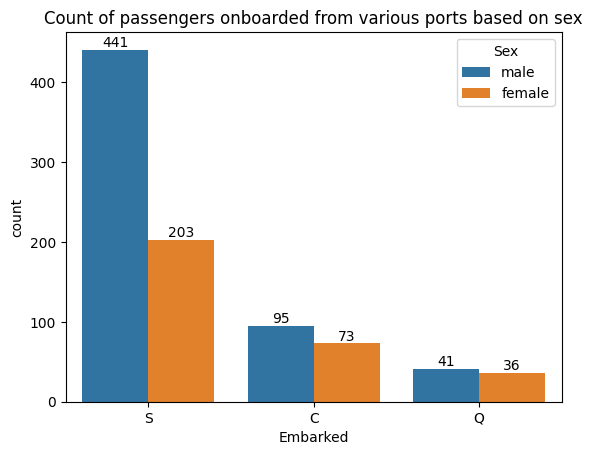

In [51]:
ax = sns.countplot(x='Embarked',hue='Sex',data=df)
ax.bar_label(ax.containers[0], label_type='edge')
ax.bar_label(ax.containers[1], label_type='edge')
plt.title("Count of passengers onboarded from various ports based on sex")